In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [3]:
data=pd.read_csv('bank_transactions_data_2.csv')
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
data.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [5]:
# Drop irrelevant columns (assuming 'TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'PreviousTransactionDate' are not needed)
data = data.drop(columns=['TransactionID', 'AccountID', 'TransactionDate' ,'DeviceID', 'IP Address', 'PreviousTransactionDate'])

data.head()

,TransactionAmount,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,M015,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,Houston,M052,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,M009,Online,19,Student,56,1,1122.35
3,184.50,Debit,Raleigh,M002,Online,26,Student,25,1,8569.06
4,13.45,Credit,Atlanta,M091,Online,26,Student,198,1,7429.40


In [6]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['TransactionType', 'Location', 'MerchantID', 'Channel', 'CustomerOccupation'], drop_first=True)
print(data.columns)

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionType_Debit',
       'Location_Atlanta', 'Location_Austin', 'Location_Baltimore',
       'Location_Boston',
       ...
       'MerchantID_M096', 'MerchantID_M097', 'MerchantID_M098',
       'MerchantID_M099', 'MerchantID_M100', 'Channel_Branch',
       'Channel_Online', 'CustomerOccupation_Engineer',
       'CustomerOccupation_Retired', 'CustomerOccupation_Student'],
      dtype='object', length=152)


In [7]:
# Separate features and target
# Assuming 'TransactionType' is the target for classification
X = data.drop('TransactionType_Debit',axis=1)
y = data['TransactionType_Debit']



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Implement SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [10]:
# Implement SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3)  # Polynomial kernel of degree 3
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

In [11]:
# Evaluate and compare models
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))

Linear Kernel Accuracy: 0.7745358090185677
Polynomial Kernel Accuracy: 0.7811671087533156


In [13]:
print("\nLinear Kernel Classification Report:\n", classification_report(y_test, y_pred_linear,zero_division=0))
print("Polynomial Kernel Classification Report:\n", classification_report(y_test, y_pred_poly,zero_division=0))


Linear Kernel Classification Report:
               precision    recall  f1-score   support

       False       0.41      0.07      0.12       165
        True       0.79      0.97      0.87       589

    accuracy                           0.77       754
   macro avg       0.60      0.52      0.50       754
weighted avg       0.71      0.77      0.71       754

Polynomial Kernel Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       165
        True       0.78      1.00      0.88       589

    accuracy                           0.78       754
   macro avg       0.39      0.50      0.44       754
weighted avg       0.61      0.78      0.69       754



In [14]:
print("\nLinear Kernel Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Polynomial Kernel Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))


Linear Kernel Confusion Matrix:
 [[ 12 153]
 [ 17 572]]
Polynomial Kernel Confusion Matrix:
 [[  0 165]
 [  0 589]]


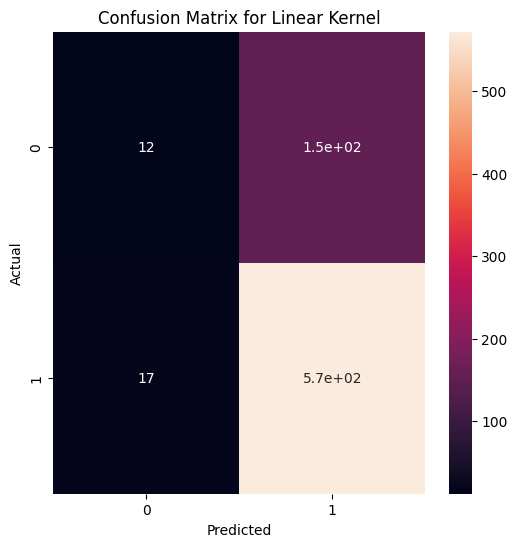

In [16]:
conf_matrix=confusion_matrix(y_test,y_pred_linear)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix,annot=True)
plt.title("Confusion Matrix for Linear Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

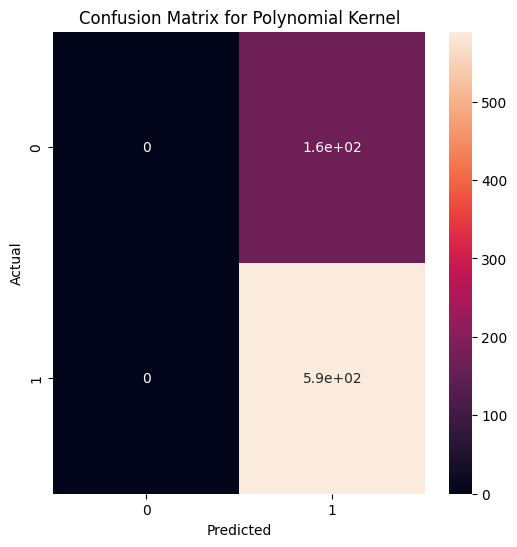

In [17]:
conf_matrix=confusion_matrix(y_test,y_pred_poly)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix,annot=True)
plt.title("Confusion Matrix for Polynomial Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()